# Practical exercise 5 report

In [2]:
import scipy.io
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.metrics
import keras.utils
import keras.models
import keras.optimizers
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving digitsData.mat to digitsData.mat


In [5]:
dataset = scipy.io.loadmat("digitsData.mat")
X = dataset['X']
Y = dataset['Y']
Y = Y % 10

In [6]:
# Perform scaling features
scaling = sklearn.preprocessing.MinMaxScaler(feature_range=(-1,1)).fit(X)
x = scaling.transform(X)

# divide X, y into tain and test data
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.2, random_state=0)

# Convert to categorical labels
Y_train = keras.utils.to_categorical(Y_train)

# models and parameters

In [7]:
# Defining Keras model
# Neural Network parameters
input_layer_size = 400 # 20x20 Input Images of Digits
hidden_layer_size = 25 # 25 hidden units
num_label = 10 # 10 labels, from 0 to 9

In [8]:
# define architecture of Neurol Network
model = keras.models.Sequential()
model.add(Dense(hidden_layer_size, input_dim=input_layer_size, activation='sigmoid')) # Add Input & Hidden Layer
model.add(Dense(num_label, activation='sigmoid'))                                     # Output layer

In [9]:
# define optimizer to use for training
sgd = keras.optimizers.SGD(learning_rate=0.05)  # learning rate 0.005
rms = keras.optimizers.RMSprop(learning_rate=0.05)  # learning rate 0.005
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

In [10]:
# Start neural network training
history = model.fit(X_train, Y_train, epochs=100, batch_size=40, verbose=1)

Epoch 1/100
100/100 [==============================] - 1s 2ms/step - loss: 0.7792 - accuracy: 0.7548
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.8953
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.9202
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2193 - accuracy: 0.9300
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1888 - accuracy: 0.9433
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1689 - accuracy: 0.9467
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1273 - accuracy: 0.9615
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1209 - accuracy: 0.9613
Epoch 9/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1077 - accuracy: 0.9607
Epoch 10/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0863 - accura

In [11]:
# Evaluation of the accuracy
Y_pred = np.argmax(model.predict(X_test), axis=-1)
accuracy = sklearn.metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy = " + str(round(accuracy*100, 2)) + "%")

32/32 [==============================] - 0s 1ms/step
Accuracy = 93.3%


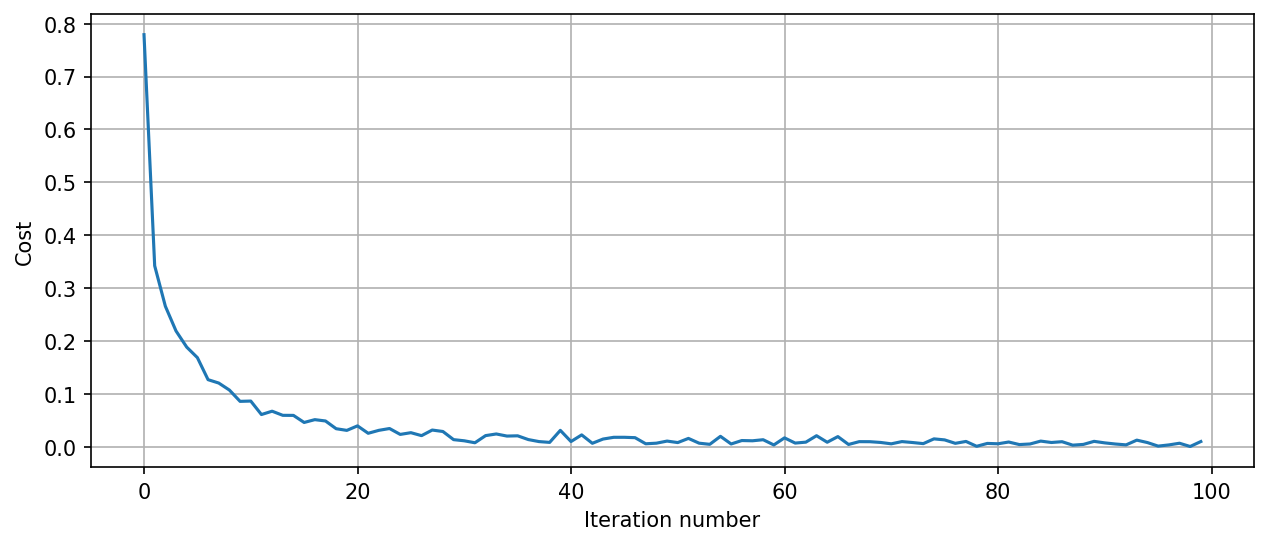

In [12]:
# visualization of the cost function
plt.figure(num=None, figsize=(10,4), dpi=150, facecolor='w', edgecolor='k')
plt.plot(history.history['loss'])
plt.xlabel("Iteration number")
plt.ylabel('Cost')
plt.grid()
plt.show()

In [13]:
def CustomParameters(nb_hidden_layer = 1, optimizer = keras.optimizers.SGD(learning_rate=0.05), nb_iteration = 100, batch_size = 4000):
    input_layer_size = 400
    hidden_layer_size = 25
    num_label = 10
    model = keras.models.Sequential()
    for i in range(nb_hidden_layer):
        model.add(Dense(hidden_layer_size, input_dim=input_layer_size, activation='sigmoid'))
    model.add(Dense(num_label, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=nb_iteration, batch_size=batch_size, verbose=1)
    Y_pred = np.argmax(model.predict(X_test), axis=-1)
    accuracy = sklearn.metrics.accuracy_score(Y_test, Y_pred)
    print("Accuracy = " + str(round(accuracy*100, 2)) + "%")
    Y_pred = np.argmax(model.predict(X_test), axis=-1)
    accuracy = sklearn.metrics.accuracy_score(Y_test, Y_pred)
    print("Accuracy = " + str(round(accuracy*100, 2)) + "%")
    plt.figure(num=None, figsize=(10,4), dpi=150, facecolor='w', edgecolor='k')
    plt.plot(history.history['loss'])
    plt.xlabel("Iteration number")
    plt.ylabel('Cost')
    plt.grid()
    plt.show()

### A - 1 hidden layer mdel: SGD optimizer, learning rate 0.005, 100 iterations, BatchSize 4000

Epoch 1/100
1/1 [==============================] - 0s 412ms/step - loss: 2.5119 - accuracy: 0.1020
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 2.5098 - accuracy: 0.1020
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 2.5078 - accuracy: 0.1020
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 2.5058 - accuracy: 0.1020
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 2.5038 - accuracy: 0.1020
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 2.5018 - accuracy: 0.1020
Epoch 7/100
1/1 [==============================] - 0s 29ms/step - loss: 2.4999 - accuracy: 0.1020
Epoch 8/100
1/1 [==============================] - 0s 26ms/step - loss: 2.4980 - accuracy: 0.1020
Epoch 9/100
1/1 [==============================] - 0s 35ms/step - loss: 2.4961 - accuracy: 0.1020
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 2.4942 - accuracy: 0.1020
Epoch 11/100
1/1 [

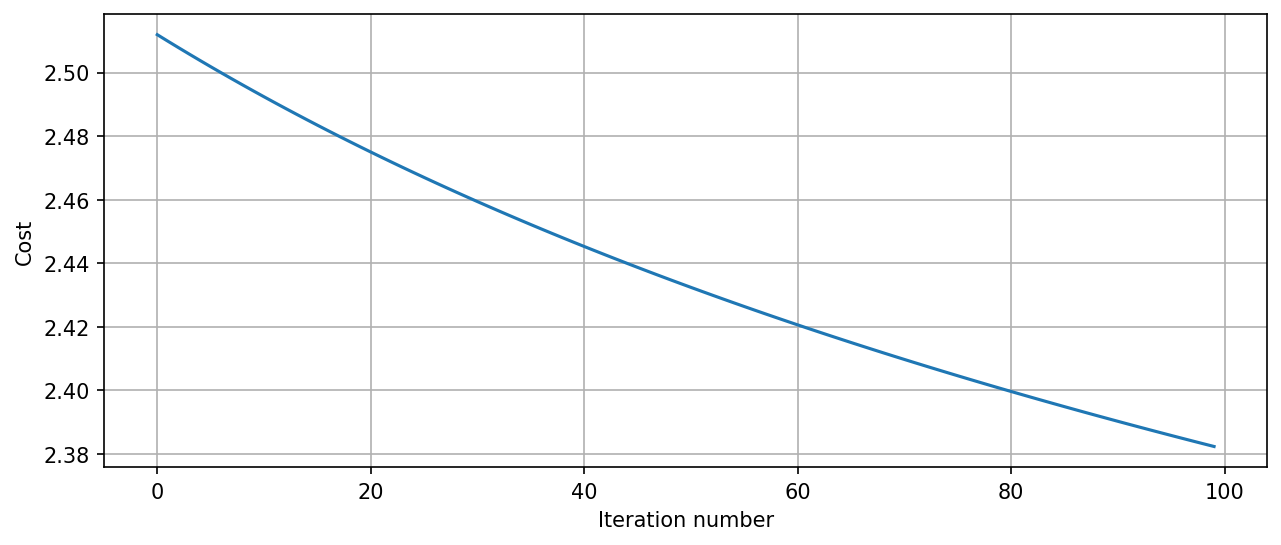

In [14]:
CustomParameters(
    nb_hidden_layer=1,
    optimizer=keras.optimizers.SGD(learning_rate=0.005),
    nb_iteration=100,
    batch_size=4000)

### B - 1 hidden layer: SGD optimizer, learning rate 0.005, 500 iterations, BatchSize 4000

Epoch 1/500
1/1 [==============================] - 0s 370ms/step - loss: 2.4365 - accuracy: 0.0995
Epoch 2/500
1/1 [==============================] - 0s 23ms/step - loss: 2.4344 - accuracy: 0.0995
Epoch 3/500
1/1 [==============================] - 0s 35ms/step - loss: 2.4322 - accuracy: 0.0995
Epoch 4/500
1/1 [==============================] - 0s 25ms/step - loss: 2.4302 - accuracy: 0.0995
Epoch 5/500
1/1 [==============================] - 0s 31ms/step - loss: 2.4281 - accuracy: 0.0995
Epoch 6/500
1/1 [==============================] - 0s 25ms/step - loss: 2.4261 - accuracy: 0.0995
Epoch 7/500
1/1 [==============================] - 0s 21ms/step - loss: 2.4241 - accuracy: 0.0995
Epoch 8/500
1/1 [==============================] - 0s 19ms/step - loss: 2.4222 - accuracy: 0.0995
Epoch 9/500
1/1 [==============================] - 0s 24ms/step - loss: 2.4202 - accuracy: 0.0995
Epoch 10/500
1/1 [==============================] - 0s 26ms/step - loss: 2.4183 - accuracy: 0.0995
Epoch 11/500
1/1 [

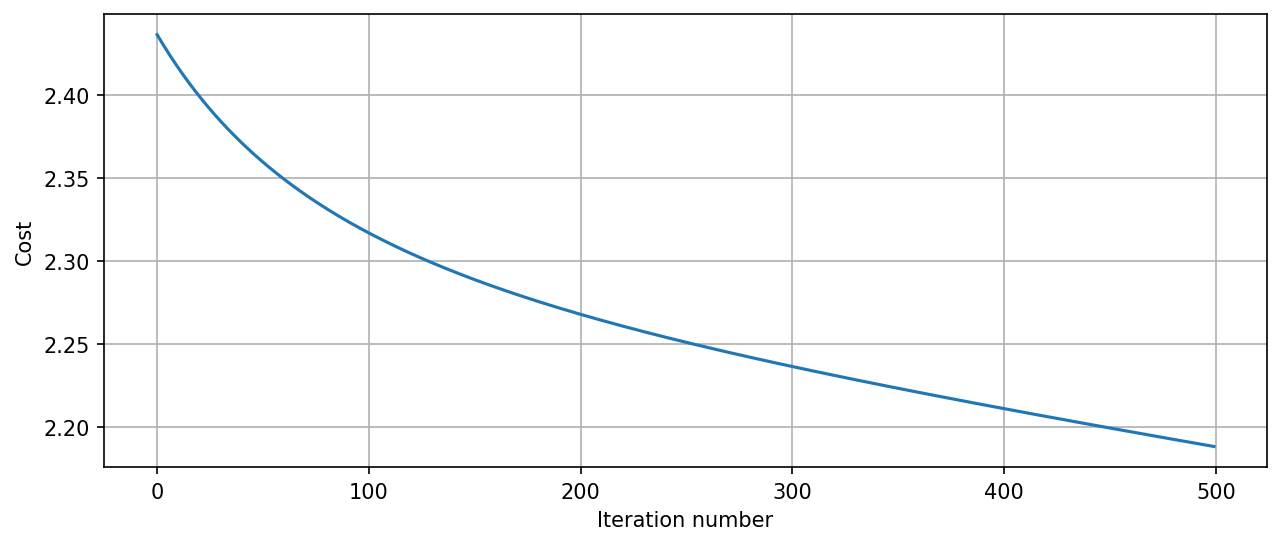

In [15]:
CustomParameters(
    nb_hidden_layer=1,
    optimizer=keras.optimizers.SGD(learning_rate=0.005),
    nb_iteration=500,
    batch_size=4000)

### C - 1 hidden layer: SGD optimizer, learning rate 0.05, 100 iterations, BatchSize 40

Epoch 1/100
100/100 [==============================] - 0s 2ms/step - loss: 2.1881 - accuracy: 0.3460
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 1.9390 - accuracy: 0.6308
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 1.6985 - accuracy: 0.6925
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 1.4751 - accuracy: 0.7350
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 1.2917 - accuracy: 0.7607
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 1.1457 - accuracy: 0.7770
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 1.0295 - accuracy: 0.7912
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - loss: 0.9368 - accuracy: 0.7987
Epoch 9/100
100/100 [==============================] - 0s 2ms/step - loss: 0.8616 - accuracy: 0.8133
Epoch 10/100
100/100 [==============================] - 0s 2ms/step - loss: 0.7980 - accura

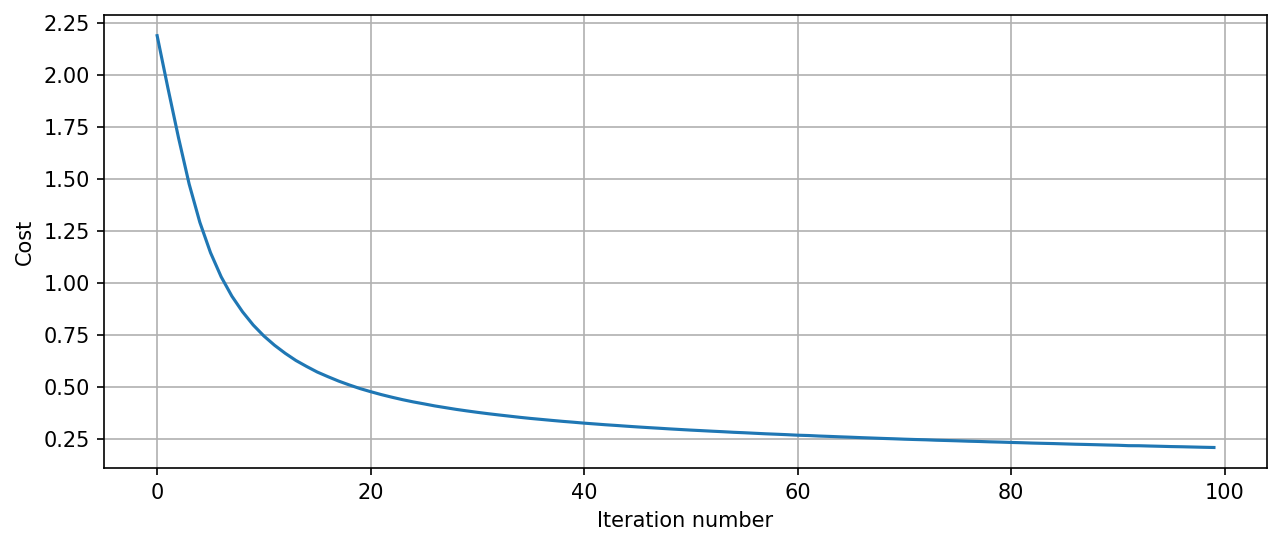

In [16]:
CustomParameters(
    nb_hidden_layer=1,
    optimizer=keras.optimizers.SGD(learning_rate=0.05),
    nb_iteration=100,
    batch_size=40)

### D - 1 hidden layer: RMSProp optimizer, learning rate 0.005, 100 iterations, BatchSize 400

Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 1.9915 - accuracy: 0.4655
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.5259 - accuracy: 0.7400
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 1.2491 - accuracy: 0.7910
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0455 - accuracy: 0.8260
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.8893 - accuracy: 0.8390
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7687 - accuracy: 0.8565
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6714 - accuracy: 0.8708
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5929 - accuracy: 0.8857
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5299 - accuracy: 0.8890
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4797 - accuracy: 0.9025
Epoch 11/

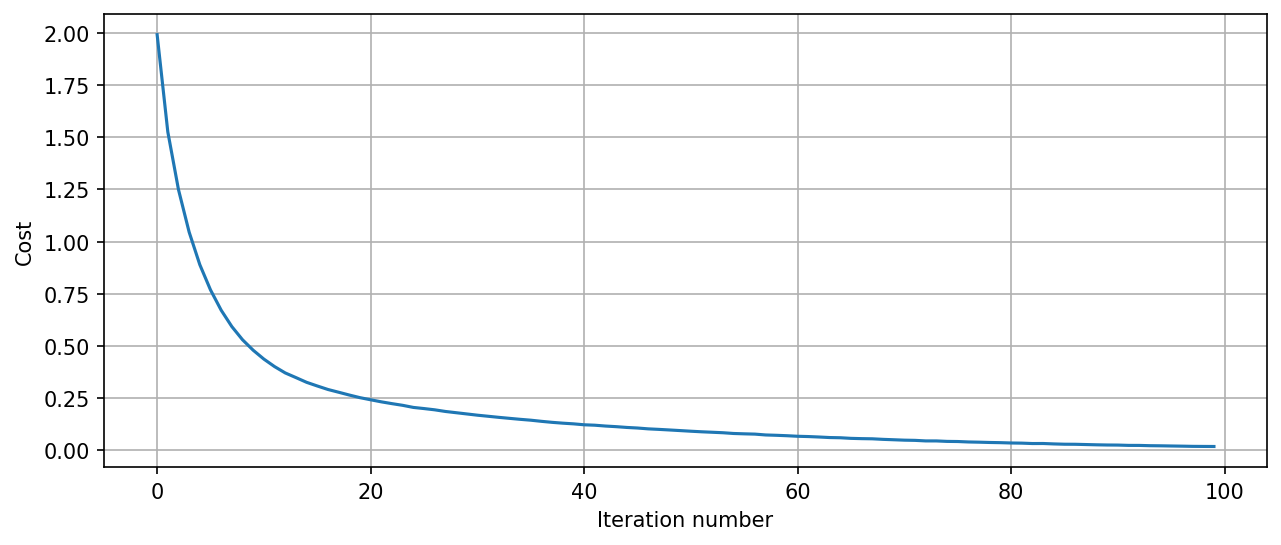

In [17]:
CustomParameters(
    nb_hidden_layer=1,
    optimizer=keras.optimizers.RMSprop(learning_rate=0.005),
    nb_iteration=100,
    batch_size=400)

### E - 2 hidden layers: RMSProp optimizer, learning rate 0.0005, 100 iterations, BatchSize 400

Epoch 1/100
10/10 [==============================] - 1s 4ms/step - loss: 2.4371 - accuracy: 0.0997
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 2.3763 - accuracy: 0.1002
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 2.3374 - accuracy: 0.1145
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 2.3062 - accuracy: 0.1493
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 2.2796 - accuracy: 0.1715
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 2.2561 - accuracy: 0.1918
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 2.2350 - accuracy: 0.2150
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 2.2152 - accuracy: 0.2457
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 2.1961 - accuracy: 0.2848
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 2.1774 - accuracy: 0.3413
Epoch 11/

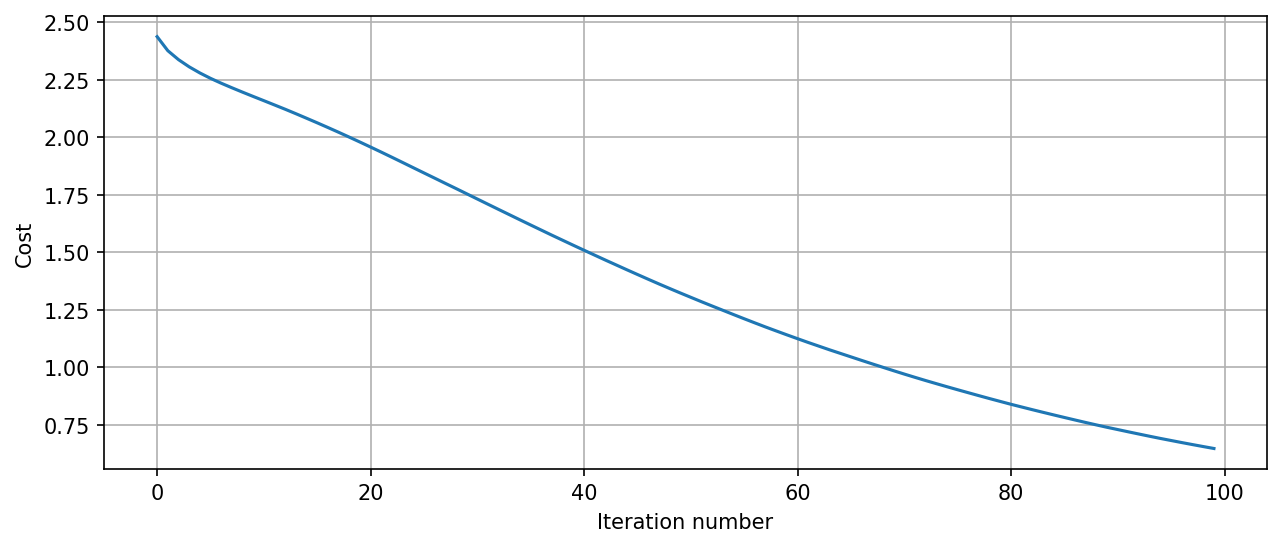

In [18]:
CustomParameters(
    nb_hidden_layer=2,
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0005),
    nb_iteration=100,
    batch_size=400)

F - Custom model : 3 hidden layer: SGD optimizer, learning rate 0.82, 69 iterations, BatchSize 30

Epoch 1/69
134/134 [==============================] - 1s 2ms/step - loss: 2.3306 - accuracy: 0.1090
Epoch 2/69
134/134 [==============================] - 0s 2ms/step - loss: 1.8680 - accuracy: 0.3055
Epoch 3/69
134/134 [==============================] - 0s 2ms/step - loss: 1.1549 - accuracy: 0.5882
Epoch 4/69
134/134 [==============================] - 0s 2ms/step - loss: 0.7571 - accuracy: 0.7600
Epoch 5/69
134/134 [==============================] - 0s 3ms/step - loss: 0.5781 - accuracy: 0.8305
Epoch 6/69
134/134 [==============================] - 1s 4ms/step - loss: 0.4621 - accuracy: 0.8655
Epoch 7/69
134/134 [==============================] - 1s 4ms/step - loss: 0.3900 - accuracy: 0.8878
Epoch 8/69
134/134 [==============================] - 1s 7ms/step - loss: 0.3456 - accuracy: 0.9005
Epoch 9/69
134/134 [==============================] - 1s 5ms/step - loss: 0.3159 - accuracy: 0.9085
Epoch 10/69
134/134 [==============================] - 0s 2ms/step - loss: 0.2611 - accuracy: 0.9317

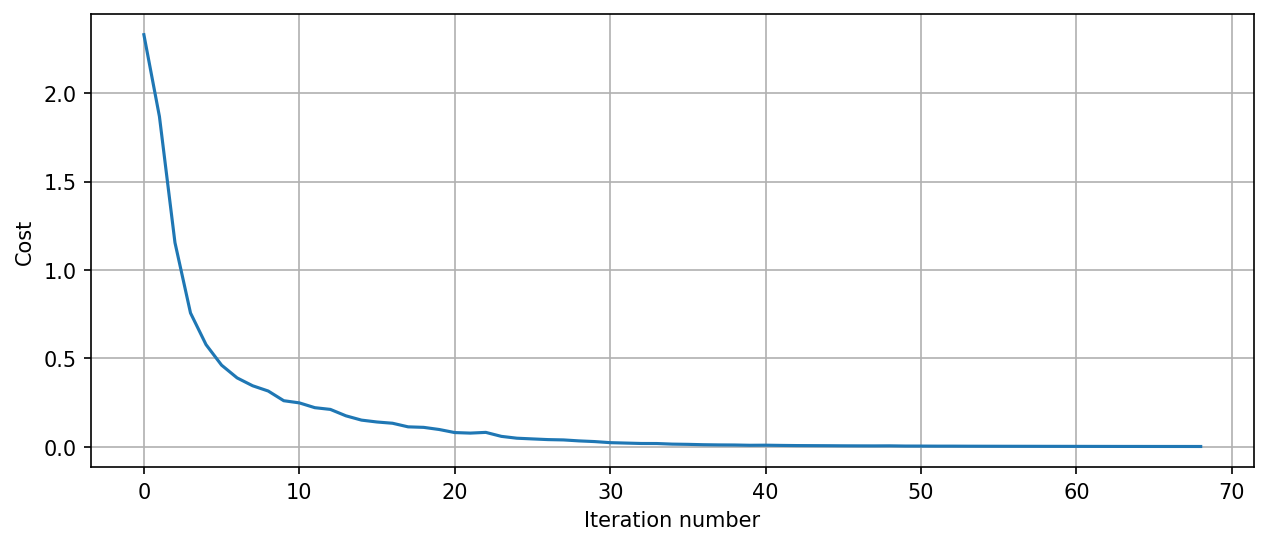

In [20]:
CustomParameters(
    nb_hidden_layer=3,
    optimizer=keras.optimizers.SGD(learning_rate=0.82),
    nb_iteration=69,
    batch_size=30)